In [1]:
#import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.formula.api as sm
from scipy import stats
%matplotlib inline

In [2]:
#Read in population data from .txt file.
opop = open("USPopulation_Wikipedia.txt", "r")
rpop = opop.read()
spop = rpop.split('\n')
population = [i.split("""\t""") for i in spop]
for i in population:
    del i[4:]
    del i[:2]
population = [[x.strip(' )') for x in i] for i in population]
dfp = pd.DataFrame(population)
dfp.columns = ['State', 'Population']

#Read in vegetarian data from .txt file.
oveg = open("USVegetarianRestaurants_HappyCow.txt", "r")
rveg = oveg.read()
sveg = rveg.split('\n')
vegrests = [i.split("""(""") for i in sveg]
vegrests = [[x.strip(""" )\\""") for x in i] for i in vegrests]
dfv = pd.DataFrame(vegrests)
dfv.columns = ['State', 'Restaurants']

#Join dataframes on state.
data = pd.merge(dfv, dfp, on='State')
data['Population'] = data['Population'].str.replace(',', '')
data[['Restaurants', 'Population']] = data[['Restaurants', 'Population']].astype(float)
data['PopulationMM'] = (data.Population/1000000).round(2)

In [3]:
#Run OLS regression
results = sm.ols('Restaurants ~ Population', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Restaurants   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 08 Oct 2016   Prob (F-statistic):           8.99e-21
Time:                        18:08:43   Log-Likelihood:                -336.02
No. Observations:                  51   AIC:                             676.0
Df Residuals:                      49   BIC:                             679.9
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -38.1737     33.529     -1.139      0.260      -105.553    29.206
Population  5.538e-05   3.52e-06     15.718      0.000      4.83e-05  6.25e-05
==============================================================================
Omnibus:                       19.052   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.954
Skew:                           0.351   Prob(JB):                     4.02e-26
Kurtosis:                      10.385   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

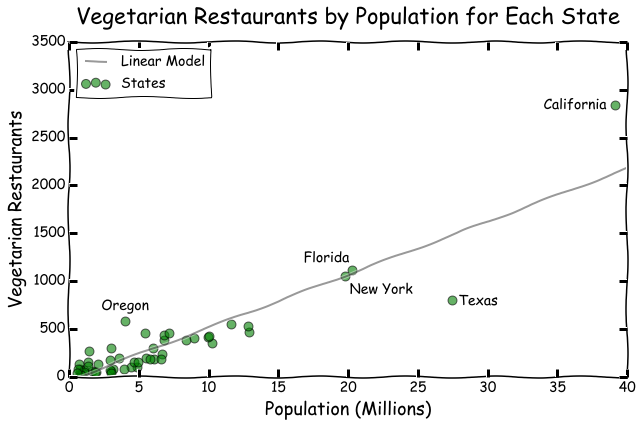

In [4]:
pl.xkcd()
x = np.linspace(0,50000000, 1000000)
y = x*results.params[1]+results.params[0]
ax = pl.figure(figsize=(10, 6)).add_subplot(111)
ax.axis([0, 40, 0, 3500])
ax.plot(x/1000000,y, c = 'k', alpha = 0.4, label = 'Linear Model')
ax.scatter(data.PopulationMM, data.Restaurants, alpha = 0.6, c = 'g', s = 80, label = 'States')
ax.legend(loc = 'upper left', fontsize = '14')
ax.set_ylabel('Vegetarian Restaurants', fontsize = '18')
ax.set_xlabel('Population (Millions)', fontsize = '18')
ax.set_title('Vegetarian Restaurants by Population for Each State', fontsize = '22', y = 1.04)
ax.text(34, 2800, 'California', fontsize = '14')
ax.text(27.9, 750, 'Texas', fontsize = '14')
ax.text(16.8, 1200, 'Florida', fontsize = '14')
ax.text(20.1, 870, 'New York', fontsize = '14')
ax.text(2.3, 700, 'Oregon', fontsize = '14')

In [5]:
data['Difference'] = data.Restaurants - (data.Population*results.params[1] + results.params[0])
data['zscore'] = stats.zscore(data.Difference)
data['RperMM'] = data.Restaurants/data.PopulationMM
data.sort_values('zscore').head()

,State,Restaurants,Population,PopulationMM,Difference,zscore,RperMM
43,Texas,798.0,27469114.0,27.47,-685.038756,-3.895451,29.049873
13,Illinois,468.0,12859995.0,12.86,-206.000164,-1.171413,36.391913
10,Georgia,351.0,10214860.0,10.21,-176.515198,-1.003748,34.378061
42,Tennessee,182.0,6600299.0,6.60,-145.344377,-0.826496,27.575758
38,Pennsylvania,529.0,12802503.0,12.80,-141.816314,-0.806434,41.328125


In [6]:
data.sort_values('zscore', ascending = False).head()

,State,Restaurants,Population,PopulationMM,Difference,zscore,RperMM
4,California,2837.0,39144818.0,39.14,707.372279,4.022450,72.483393
37,Oregon,583.0,4028977.0,4.03,398.052897,2.263515,144.665012
11,Hawaii,274.0,1431603.0,1.43,232.892906,1.324338,191.608392
5,Colorado,458.0,5456574.0,5.46,193.993984,1.103141,83.882784
44,Utah,298.0,2995919.0,3.00,170.262630,0.968193,99.333333


In [7]:
data.sort_values('RperMM', ascending = True).head()

,State,Restaurants,Population,PopulationMM,Difference,zscore,RperMM
24,Mississippi,37.0,2992333.0,2.99,-90.538781,-0.514846,12.374582
3,Arkansas,60.0,2978204.0,2.98,-66.756331,-0.379608,20.134228
0,Alabama,106.0,4858979.0,4.86,-124.911794,-0.710307,21.810700
36,Oklahoma,86.0,3911338.0,3.91,-92.432371,-0.525614,21.994885
17,Kentucky,106.0,4425092.0,4.43,-100.883560,-0.573671,23.927765


In [8]:
data.sort_values('RperMM', ascending = False).head()

,State,Restaurants,Population,PopulationMM,Difference,zscore,RperMM
8,District of Columbia,139.0,672228.0,0.67,139.946344,0.795800,207.462687
11,Hawaii,274.0,1431603.0,1.43,232.892906,1.324338,191.608392
37,Oregon,583.0,4028977.0,4.03,398.052897,2.263515,144.665012
45,Vermont,77.0,626042.0,0.63,80.504079,0.457784,122.222222
19,Maine,153.0,1329328.0,1.33,117.556795,0.668483,115.037594


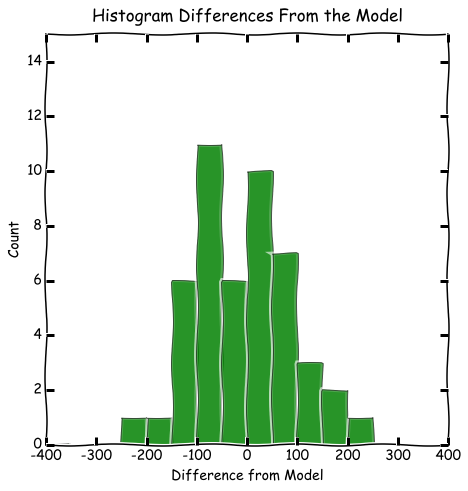

In [9]:
b = np.arange(-400, 400, 50)
fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (8,8))
pl.tight_layout(pad = 5)
ax.hist(data['Difference'], bins = b, alpha = 0.6, facecolor = 'g')
ax.axis([-400, 400, 0, 15])
ax.set_ylabel('Count')
ax.set_xlabel('Difference from Model')
ax.set_title("""Histogram Differences From the Model""", y = 1.02)